In [1]:
import numpy as np
import matplotlib.pyplot as plt
import epidemic_model_classes_numba as epi_mod
from scipy.stats import pearsonr
import os
from tqdm import tqdm

In [6]:
country = "Germany"

log_flat = []
log_past = []

for folder in os.listdir("../../logs/sdumont"):
    if "log2021-08" in folder and country in folder:
        if "True" in folder:
            log_past.append(folder)
        else:
            log_past.append(folder)

# log_flat = ["../logs/sdumont/log2021-05-27_00-36-37_fixed_DF_SEIRD_3_posts_20_day-window_past_False/",
#             "../logs/sdumont/log2021-05-27_00-38-51_fixed_DF_SEIRD_3_posts_20_day-window_past_False/",
#             "../logs/sdumont/log2021-05-27_00-41-05_fixed_DF_SEIRD_3_posts_20_day-window_past_False/",
#             "../logs/sdumont/log2021-05-27_00-43-13_fixed_DF_SEIRD_3_posts_20_day-window_past_False/",
#             "../logs/sdumont/log2021-05-27_00-46-47_fixed_DF_SEIRD_3_posts_20_day-window_past_False/"]

# log_past = ["../logs/sdumont/log2021-05-27_00-49-03_fixed_DF_SEIRD_3_posts_20_day-window_past_True/",
#             "../logs/sdumont/log2021-05-27_01-03-18_fixed_DF_SEIRD_3_posts_20_day-window_past_True/",
#             "../logs/sdumont/log2021-05-27_01-19-37_fixed_DF_SEIRD_3_posts_20_day-window_past_True/",
#             "../logs/sdumont/log2021-05-27_01-33-27_fixed_DF_SEIRD_3_posts_20_day-window_past_True/",
#             "../logs/sdumont/log2021-05-27_01-49-00_fixed_DF_SEIRD_3_posts_20_day-window_past_True/"]

FileNotFoundError: [Errno 2] No such file or directory: '../../logs/sdumont'

In [3]:
n_post = len(os.listdir(log_flat[0]))-1
days_folders = os.listdir(log_flat[0]+"/Posterior1/DF/SEIRD/")
for i in range(len(days_folders)):
    days_folders[i] = int(days_folders[i].split("_")[0])
days_folders.sort()
n_window = len(days_folders)

print(n_post)
print(n_window)
print(days_folders)

3
81
[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420]


In [4]:
seird = epi_mod.SEIRD

In [5]:
y_fit = np.zeros((n_window, 20, 2))
y_pred = np.zeros((n_window, 11, 2))

flat_params = np.zeros((len(log_flat), n_window, 9))
rmsd_flat_fit = np.zeros((len(log_flat), n_window))
rmsd_flat_pred = np.zeros((len(log_flat), n_window))
rmsd_flat_list = np.zeros((len(log_flat), n_window, 10, 2))
flat_tolerances = np.zeros((len(log_flat), n_post, n_window))

past_params = np.zeros((len(log_flat), n_window, 9))
rmsd_past_fit = np.zeros((len(log_flat), n_window))
rmsd_past_pred = np.zeros((len(log_flat), n_window))
rmsd_past_list = np.zeros((len(log_flat), n_window, 10, 2))
past_tolerances = np.zeros((len(log_flat), n_post, n_window))

In [6]:
for log_idx in range(len(log_flat)):
    for window in tqdm(range(n_window)):
        log = open(log_flat[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")
        y_fit[window] = np.loadtxt(log_flat[log_idx]+"Posterior1/DF/SEIRD/"+str(days_folders[window])+"_days/data.txt")[:20,1:]
        y_pred[window] = np.loadtxt(log_flat[log_idx]+"Posterior1/DF/SEIRD/"+str(days_folders[window])+"_days/data.txt")[-11:,1:]
        rmsd_flat_list[log_idx, window] = np.loadtxt(log_flat[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/val_error.txt")
        flat_params[log_idx, window] = np.loadtxt(log_flat[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_flat_fit[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_flat_pred[log_idx, window] = float(line.split(" ")[-1])

        for post in range(n_post):
            log = open(log_flat[log_idx]+"Posterior"+str(post+1)+"/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_flat[log_idx]+"Posterior"+str(post+1)+"/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    flat_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
for log_idx in range(len(log_past)):
    for window in tqdm(range(n_window)):
        log = open(log_past[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_past_list[log_idx, window] = np.loadtxt(log_past[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/val_error.txt")
        past_params[log_idx, window] = np.loadtxt(log_past[log_idx]+"Posterior3/DF/SEIRD/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_past_fit[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_past_pred[log_idx, window] = float(line.split(" ")[-1])
                
        for post in range(n_post):
            log = open(log_past[log_idx]+"Posterior"+str(post+1)+"/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    past_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_past[log_idx]+"Posterior"+str(post+1)+"/DF/SEIRD/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    past_tolerances[log_idx, post, window] = float(line.split(" ")[-1])

100%|██████████| 81/81 [00:04<00:00, 19.39it/s]


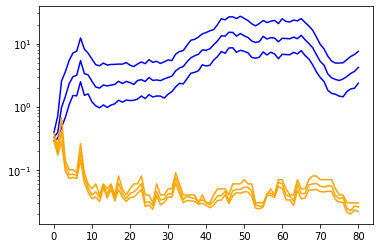

In [7]:
plt.plot(flat_tolerances[0].T, c="blue")
plt.plot(past_tolerances[0].T, c="orange")
plt.yscale("log")

Flat 0.12796691358024692
Past 0.023615128395061726


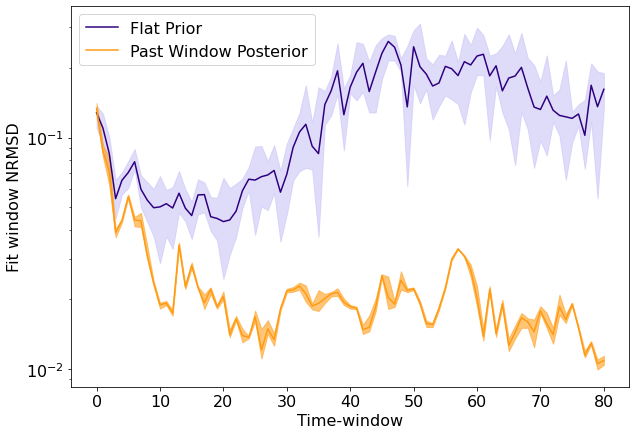

In [8]:
plt.rcParams.update({"font.size":16})
plt.figure(figsize=(10,7))
plt.plot(np.mean(rmsd_flat_fit, axis=0), color="#2f007d", label="Flat Prior")
plt.fill_between(np.arange(len(rmsd_flat_fit[0])), np.min(rmsd_flat_fit, axis=0), np.max(rmsd_flat_fit, axis=0), alpha=0.6, color="#cac5f8")
plt.plot(np.mean(rmsd_past_fit, axis=0), color="#ff9b13", label="Past Window Posterior")
plt.fill_between(np.arange(len(rmsd_flat_fit[0])), np.min(rmsd_past_fit, axis=0), np.max(rmsd_past_fit, axis=0), alpha=0.6, color="#ff9f1d")
plt.legend(loc="upper left")
plt.xlabel("Time-window")
plt.ylabel("Fit window NRMSD")
plt.yscale("log")
# plt.savefig("")
print("Flat", np.mean(rmsd_flat_fit))
print("Past", np.mean(rmsd_past_fit))

Flat 0.8534713580246913
Past 0.24086081728395065


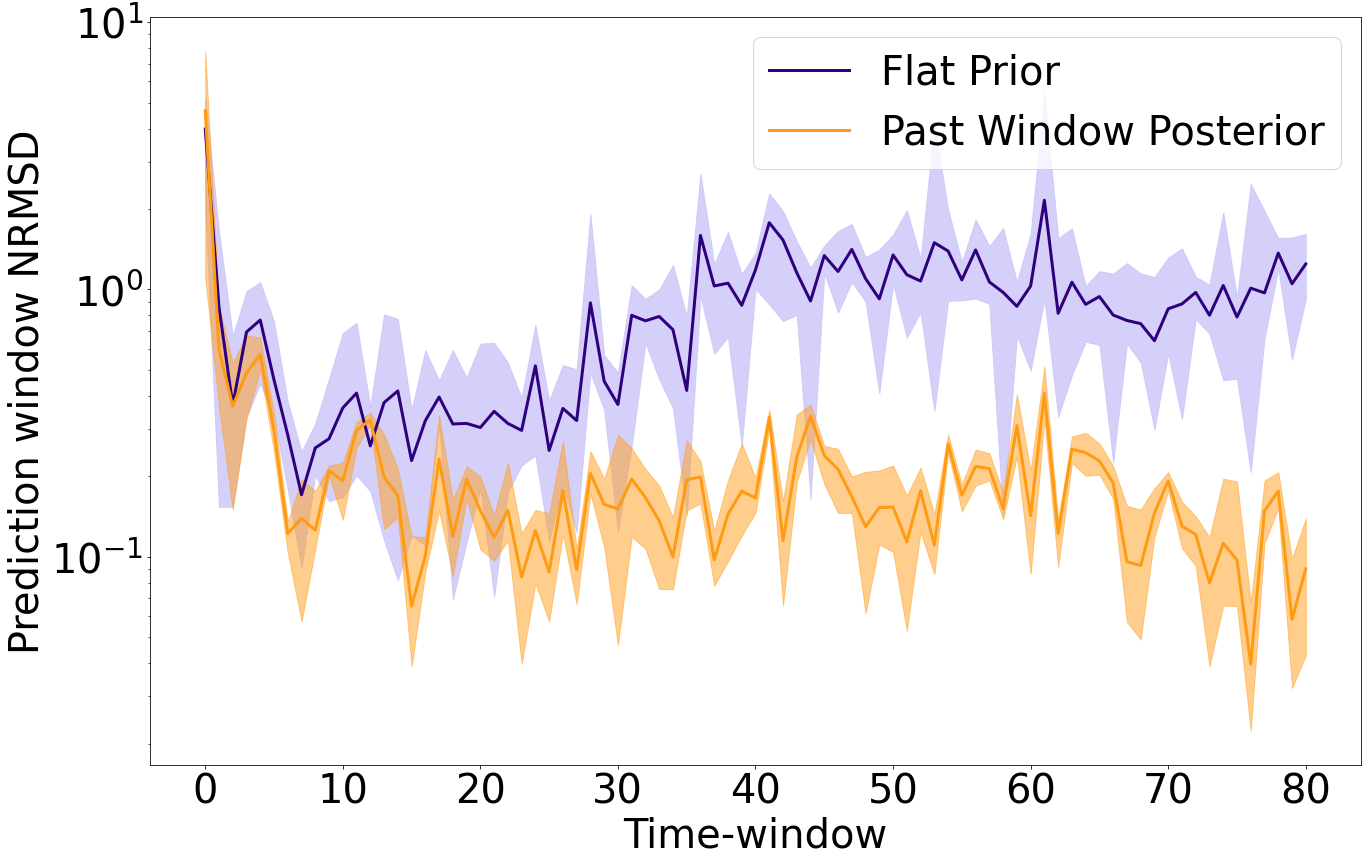

In [103]:
plt.rcParams.update({"font.size":40})
plt.figure(figsize=(20, 13))
plt.plot(np.mean(rmsd_flat_pred, axis=0), lw=3, color="#2f007d", label="Flat Prior")
plt.fill_between(np.arange(len(rmsd_flat_pred[0])), np.min(rmsd_flat_pred, axis=0), np.max(rmsd_flat_pred, axis=0), alpha=0.8, color="#cac5f8")
plt.plot(np.mean(rmsd_past_pred, axis=0), lw=3, color="#ff9b13", label="Past Window Posterior")
plt.fill_between(np.arange(len(rmsd_flat_pred[0])), np.min(rmsd_past_pred, axis=0), np.max(rmsd_past_pred, axis=0), alpha=0.5, color="#ff9f1d")
plt.legend(loc="upper right")
plt.xlabel("Time-window")
plt.ylabel("Prediction window NRMSD")
plt.yscale("log")
plt.tight_layout()
plt.savefig("flat_vs_past_NRMSD_20dayfit.pdf")
print("Flat", np.mean(rmsd_flat_pred))
print("Past", np.mean(rmsd_past_pred))

In [10]:
y_pred.shape

(81, 11, 2)

In [11]:
rmsd_flat_list.shape

(5, 81, 10, 2)

In [12]:
rmsd_flat_list_norm = np.abs((y_pred[:,2:,:]-rmsd_flat_list[:,:,1:])-(y_pred[:,1:-1,:]-rmsd_flat_list[:,:,:-1])-(y_pred[:,2:,:]-y_pred[:,1:-1,:]))/(y_pred[:,2:,:]-y_pred[:,1:-1,:]+1)
rmsd_past_list_norm = np.abs((y_pred[:,2:,:]-rmsd_past_list[:,:,1:])-(y_pred[:,1:-1,:]-rmsd_past_list[:,:,:-1])-(y_pred[:,2:,:]-y_pred[:,1:-1,:]))/(y_pred[:,2:,:]-y_pred[:,1:-1,:]+1)
# rmsd_past_list_norm = np.abs(rmsd_past_list)/(y_pred[:,1:,:]-y_pred[:,:-1,:]+1)

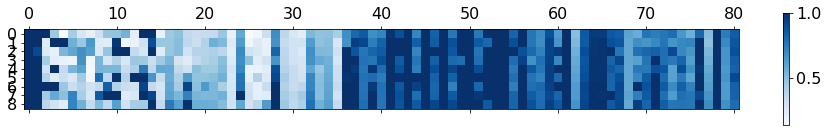

In [13]:
plt.matshow(np.mean(rmsd_flat_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Blues")
# plt.matshow(rmsd_flat_list_norm[:,:,0].T, vmax=1, cmap="Greens")
plt.colorbar()

In [14]:
rmsd_past_list_norm[:,:,0].shape

(5, 81, 2)

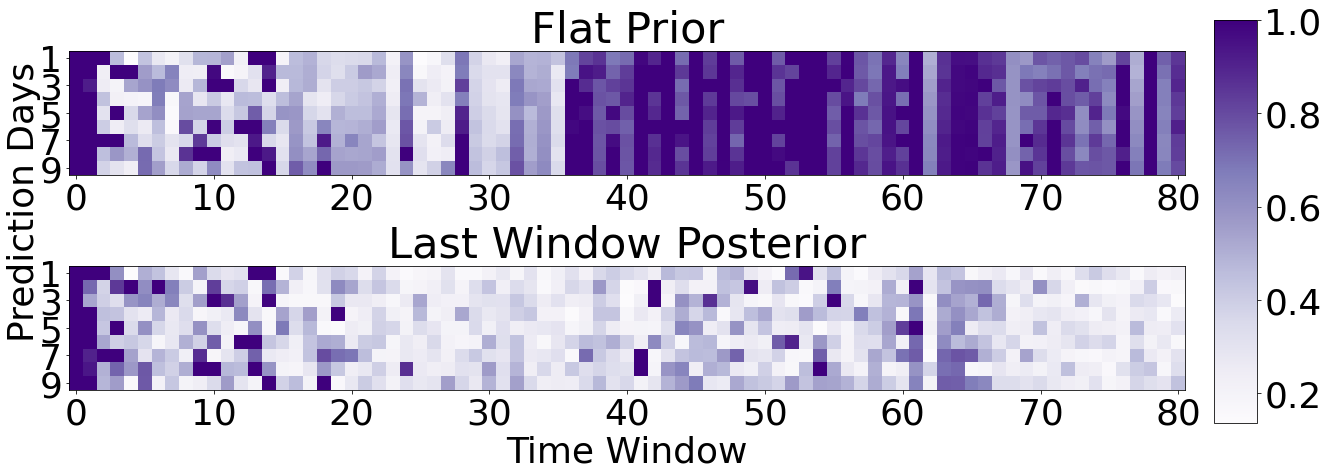

In [87]:
plt.rcParams.update({"font.size":36})
fig = plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,1,1)
pl = plt.imshow(np.mean(rmsd_flat_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Purples")
plt.yticks(range(0,10,2), labels=range(1,11,2))
plt.title("Flat Prior")
plt.subplot(2,1,2)
plt.imshow(np.mean(rmsd_past_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Purples")
plt.yticks(range(0,10,2), labels=range(1,11,2))
plt.title("Last Window Posterior")
plt.xlabel("Time Window")
plt.text(-5, 4.5, "Prediction Days", rotation="vertical")
cb_ax = fig.add_axes([0.92, 0.1, 0.03, 0.8])

fig.colorbar(pl, cax=cb_ax)
plt.savefig("flat_vs_past_heatmap.pdf", bbox_inches="tight")

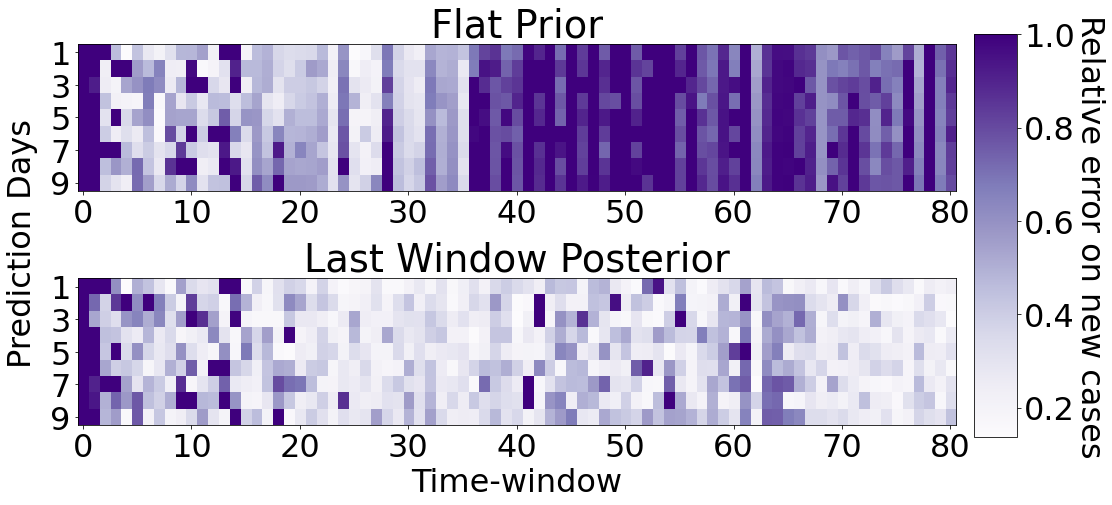

In [121]:
plt.rcParams.update({"font.size":32})
fig = plt.figure(figsize=(20,7))
# fig, ax = plt.subplots(2,1,sharey=True)
plt.subplots_adjust(hspace=0.6)
plt.subplot(2,1,1)
pl = plt.imshow(np.mean(rmsd_flat_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Purples", aspect=1.5)
plt.yticks(range(0,10,2), labels=range(1,11,2))
plt.title("Flat Prior")
plt.subplot(2,1,2)
plt.imshow(np.mean(rmsd_past_list_norm[:,:,:,0], axis=0).T, vmax=1, cmap="Purples", aspect=1.5)
plt.yticks(range(0,10,2), labels=range(1,11,2))
plt.title("Last Window Posterior")
plt.xlabel("Time-window")
plt.text(-7, 4.5, "Prediction Days", rotation="vertical")
cb_ax = fig.add_axes([0.83, 0.1, 0.03, 0.8])

cbar = fig.colorbar(pl, cax=cb_ax)
cbar.set_label("Relative error on new cases", rotation=-90, labelpad=30)
# plt.tight_layout()
plt.savefig("flat_vs_past_heatmap.pdf", bbox_inches="tight")

In [16]:
rmsd_past_list_norm[0,30]

array([[0.05081477, 0.42121084],
       [0.16096217, 0.18768505],
       [0.02990276, 0.10818155],
       [0.03822223, 0.2975598 ],
       [0.14288196, 0.40834842],
       [0.14784662, 1.50290727],
       [0.05762124, 1.44511672],
       [0.15753751, 0.40315786],
       [0.07415393, 0.49750149]])

In [17]:
(np.sqrt(np.sum((rmsd_past_list[0,30,:,0])**2)/10)/(np.max(y_pred[30,1:,0])-np.min(y_pred[30,1:,0])+1.)
+np.sqrt(np.sum((rmsd_past_list[0,30,:,1])**2)/10)/(np.max(y_pred[30,1:,1])-np.min(y_pred[30,1:,1])+1.))/2

0.04665966857566798

In [127]:
y[-1]

384851.0

In [18]:
y = np.concatenate(y_fit[::4,:,0])

In [19]:
y.shape

(420,)

In [20]:
flat_fit = np.zeros_like(y)
past_fit = np.zeros_like(y)
for window in tqdm(range(0, n_window, 4)):
    y0 = np.zeros(5)
    y0[-2:] = y_fit[window, 0]
    flat_fit[window//4*20:(window//4+1)*20] = seird.infected_dead(np.arange(20), flat_params[0, window], y0)[0]
    past_fit[window//4*20:(window//4+1)*20] = seird.infected_dead(np.arange(20), past_params[0, window], y0)[0]

100%|██████████| 21/21 [00:06<00:00,  3.26it/s]


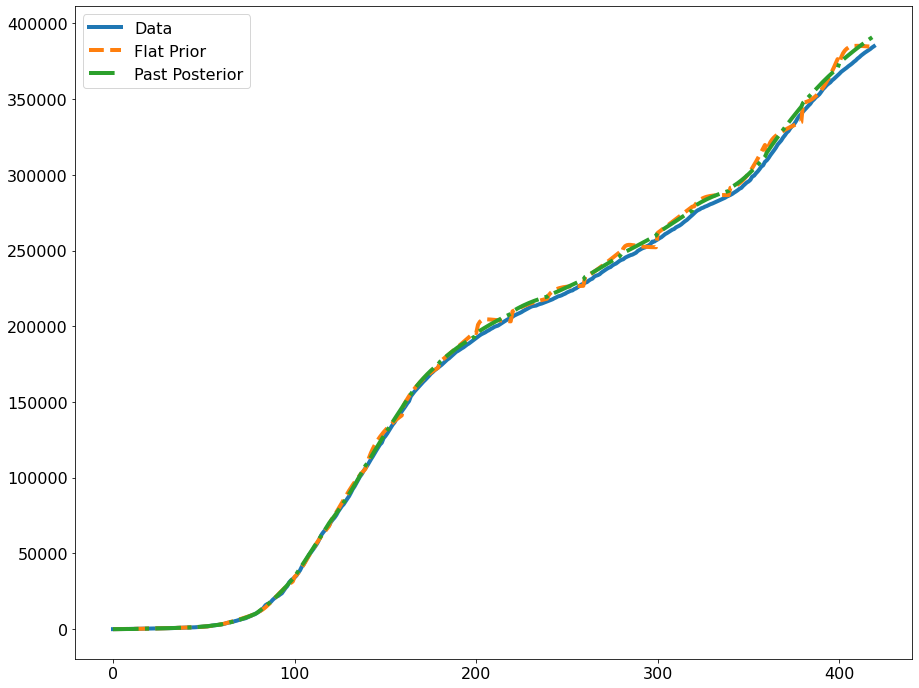

In [21]:
plt.figure(figsize=(15,12))
plt.plot(y, lw=4, label="Data")
plt.plot(flat_fit, "--", lw=4, label="Flat Prior")
plt.plot(past_fit, "-.", lw=4, label="Past Posterior")
plt.legend(loc="upper left")

In [22]:
pearsonr(rmsd_flat_fit.flatten(), rmsd_flat_pred.flatten())

(0.5609243628555474, 6.108436820516372e-35)

In [23]:
pearsonr(rmsd_past_fit.flatten(), rmsd_past_pred.flatten())

(0.679925928740478, 2.9461473253409054e-56)